# Flights in US
## by Vladimir Ploshay

> Full Dataset contains information about flights in United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. I my exploration I use only the last year of the dataset - year 2008.

In [1]:
# First of all I import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sb

I downloaded data for year 2008 from flights in US database.

In [2]:
df_2008 = pd.read_csv('2008.csv')
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


Because we have quite a lot of columns, not all of them are shown above.

In [3]:
# All columns with their types are listed below
df_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [4]:
df_2008.shape

(7009728, 29)

Dataset consists of 7 millions of rows and 29 columns.

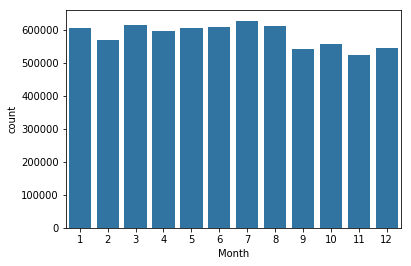

In [5]:
# lets see how the date is distributed by month
sb.countplot(data=df_2008, x='Month',color=sb.color_palette()[0]);

In last four months of the year number of flight is less than in other months.

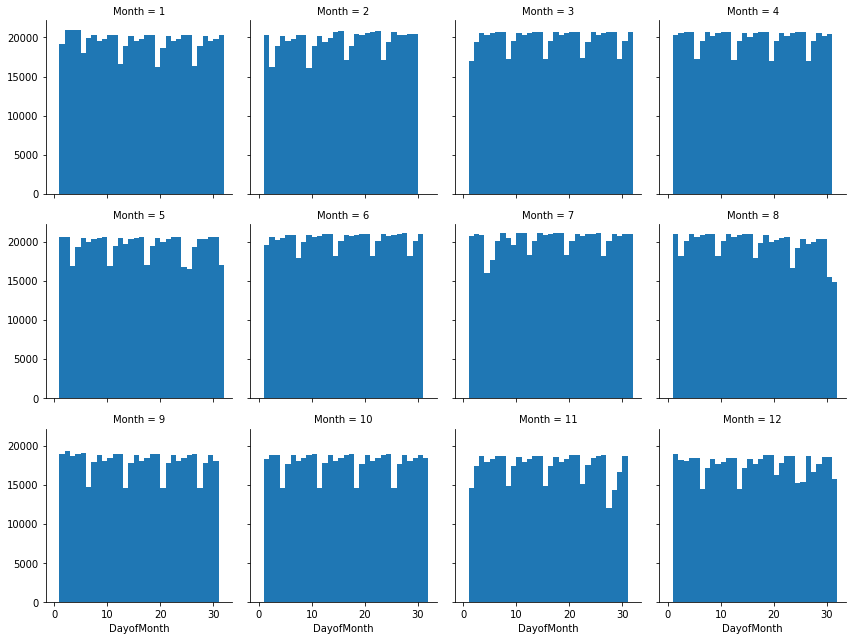

In [6]:
# I guess that scheduled flights are normally distributed without great fluctuations
bins = np.arange(0,33,1)
g = sb.FacetGrid(data=df_2008, col='Month', col_wrap=4)
g.map(plt.hist, 'DayofMonth', bins=bins);

I was right. Throughout a year number of flights is almost equal. There are no peaks, I can spot days with lower number of flights that there is on average. Another conclusion to be made - cancelled flights that we viewed earlier are more much more chaotic than scheduled flights (very obvious, isn't it). 

## Exploring flight cancellations

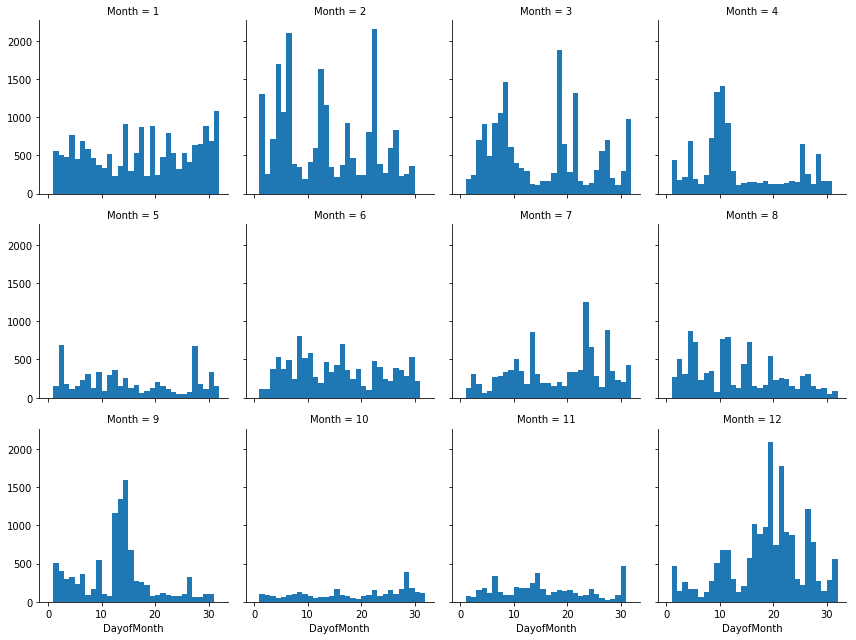

In [7]:
# Now I plot cancelled flights by Month
bins = np.arange(0,33,1)
g = sb.FacetGrid(data=df_2008.query('Cancelled==1'), col='Month', col_wrap=4)
g.map(plt.hist, 'DayofMonth', bins=bins);

Flight cancellations have peaks and plateaus. Some of months have days with more than a 1500 cancellations. They are:
February, March, September and December.

In [8]:
# We have very helpful feauture - cancellation code, although values in it aren't interpretable yet.
df_2008.CancellationCode.unique()

array([nan, 'A', 'C', 'B', 'D'], dtype=object)

In [9]:
# I replace cancellation code with interpretable names
df_2008.replace({'CancellationCode': {'A': 'carrier', 'B': 'weather', 'C':'NAS', 'D':'security'}}, inplace=True)

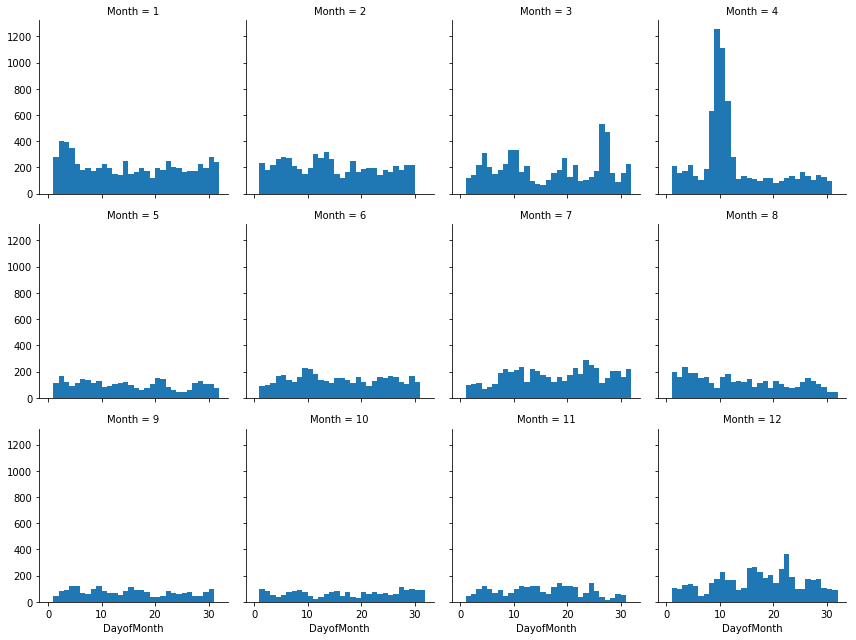

In [10]:
# I continue looking on monthly picture of cancellations. Let's check how it changes with various cancellation reasons.
bins = np.arange(0,33,1)
g = sb.FacetGrid(data=df_2008.query('Cancelled==1 and CancellationCode=="carrier"'), col='Month', col_wrap=4)
g.map(plt.hist, 'DayofMonth', bins=bins);

We see more or less table picture throughout a year, but April is an outlier to this. Why did so many flight very cancelled between first and second decade of this month? I will come back to this question a little bit later in my project.

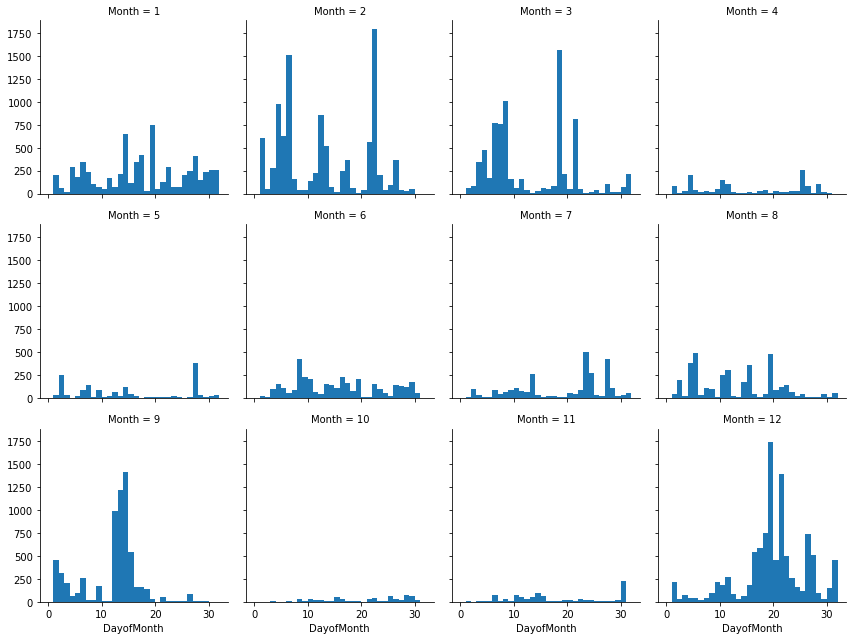

In [11]:
bins = np.arange(0,33,1)
g = sb.FacetGrid(data=df_2008.query('Cancelled==1 and CancellationCode=="weather"'), col='Month', col_wrap=4)
g.map(plt.hist, 'DayofMonth', bins=bins);

As anyone could expected, weather is much more unpredictable than carriers. From April to August it is "comfortable" weather in terms of flight cancellations. It continues to be quite a few cancellations in October and November. From December to March weather is very likely to be a cancellation reason (in September it is too).

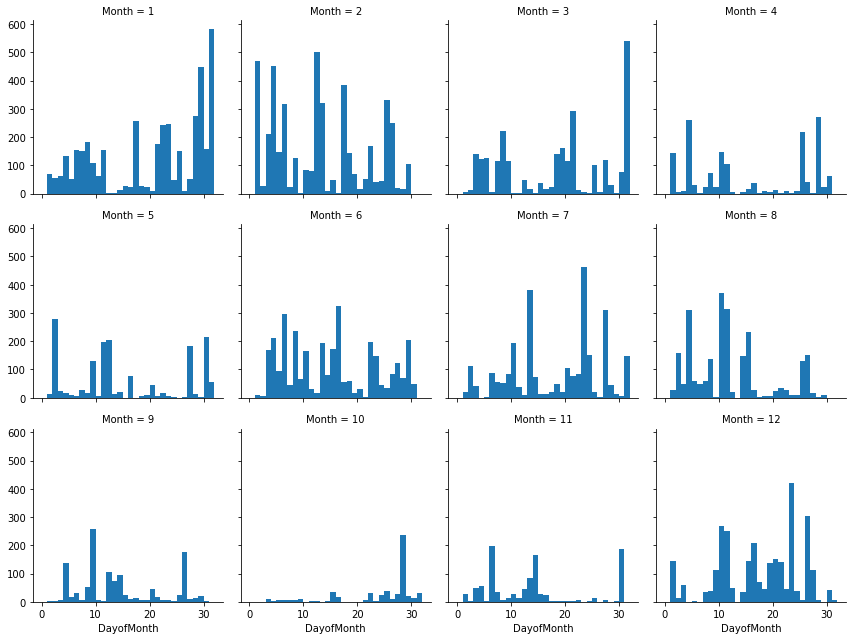

In [12]:
bins = np.arange(0,33,1)
g = sb.FacetGrid(data=df_2008.query('Cancelled==1 and CancellationCode=="NAS"'), col='Month', col_wrap=4)
g.map(plt.hist, 'DayofMonth', bins=bins);

Cancellations due to National Aerospace System (NAS) include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

For me it is not so easy to explain why it is distributed like it is. Quite a lot of reasons are included here, that complicates analysis.

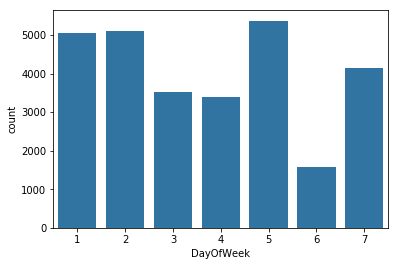

In [13]:
# Looking at monthly distribution I guess there is different proportion of NAS cancellations on days of week
sb.countplot(data=df_2008.query('Cancelled==1 and CancellationCode=="NAS"'), x='DayOfWeek', color = sb.color_palette()[0]);

During a week, I can devide cancelled flighs by NAS into three groups:
- many cancelled flights (Monday, Tuesday, Friday)
- moderate cancelled flights (Wednesday, Thursday, Sunday)
- low canceled flights (Saturday)

In [14]:
# security is a very rare cancellation reason for flights.
df_2008.query('Cancelled==1 and CancellationCode=="security"')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
913197,2008,2,5,2,NaN,905,NaN,910,EV,4285,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
927705,2008,2,5,2,NaN,935,NaN,1133,EV,4790,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
1574652,2008,3,19,3,NaN,1445,NaN,1750,MQ,3631,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
1574683,2008,3,19,3,NaN,1820,NaN,1950,MQ,3632,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
1576145,2008,3,19,3,NaN,1700,NaN,1805,MQ,3694,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
1576176,2008,3,19,3,NaN,1530,NaN,1635,MQ,3695,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
2844623,2008,5,29,4,NaN,900,NaN,1033,9E,2031,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
2868095,2008,5,30,5,NaN,710,NaN,1500,AA,202,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
2869291,2008,5,29,4,NaN,815,NaN,1055,AA,299,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN
5002380,2008,9,6,6,NaN,634,NaN,751,OO,5743,...,NaN,NaN,1,security,0,NaN,NaN,NaN,NaN,NaN


There are only 12 cases of cancellations due to security reasons in 2008. They can be explored in a table above.

Now it is time to compare cancellation reasons between each other.

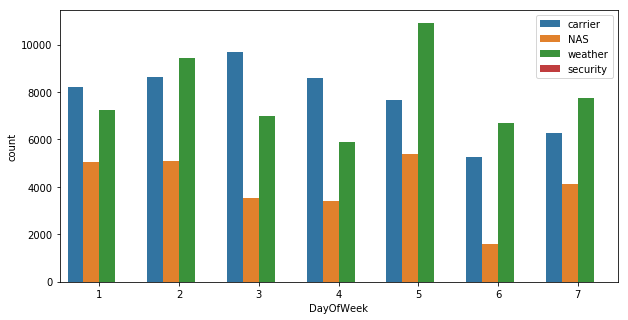

In [15]:
plt.figure(figsize=(10,5))
sb.countplot(data=df_2008.query('Cancelled==1'), x='DayOfWeek', hue='CancellationCode')
plt.legend(loc='upper right');

During the week NAS is the third main reason of flights cancellations with the lowest point on Saturday.
On some days weather is a leading cause of cancellations, on others it is carrier.

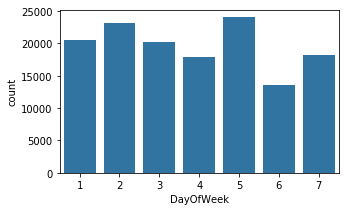

In [16]:
# Saturday had less cancellations than other days
plt.figure(figsize=(5,3))
sb.countplot(data=df_2008.query('Cancelled==1'), x='DayOfWeek', color=sb.color_palette()[0]);

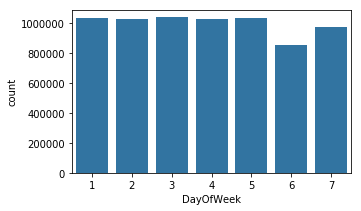

In [17]:
# However, Saturday could have less flights on that day.
plt.figure(figsize=(5,3))
sb.countplot(data=df_2008, x='DayOfWeek', color=sb.color_palette()[0]);

On Saturday there are less flights and less cancellations than on other days.

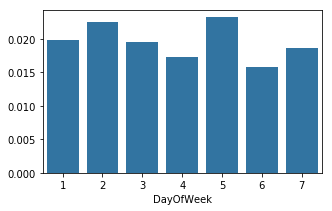

In [18]:
plt.figure(figsize=(5,3))
a = df_2008.groupby('DayOfWeek')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0]);

Saturday has the lowest cancellation percentage.

What is the gap between the best day in the year in terms of flights cancellations and the worst?

In [19]:
a=df_2008.groupby(['Month', 'DayofMonth'])['Cancelled'].mean()
a.min(), a.max(), a.max()/a.min()

(0.002034358047016275, 0.110951773953686, 54.538960885678534)

The day with biggest cancellation rate has 55 times higher cancellation percentage than the day with lowest cancellations.

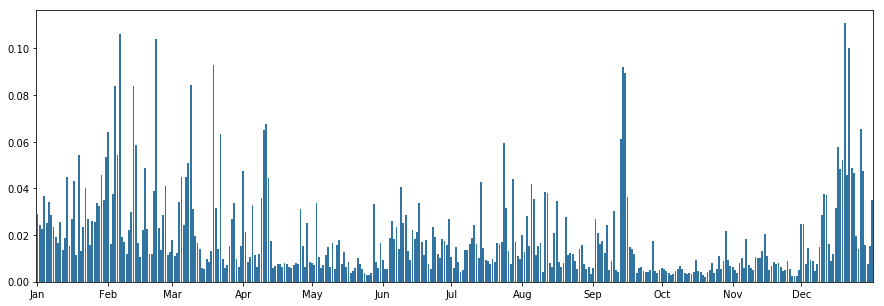

In [20]:
# During the year cancellation percentage rises and falls
plt.figure(figsize=(15,5))
ticks=[0,31,59, 90, 120, 151, 181, 212, 243, 273,304, 334]
ticknames = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0])
plt.xticks(ticks,ticknames);

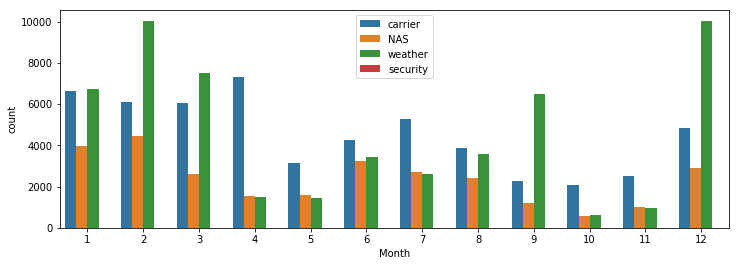

In [21]:
# We are coming back to cancellation reasons comparison
plt.figure(figsize=(12,4))
sb.countplot(data=df_2008.query('Cancelled==1'), x='Month', hue='CancellationCode')
plt.legend(loc='upper center');

Throughout the year weather is a main reason for cancellations in January-March, September, December.
In other months carrier is the dominating cause of flights cancellations.

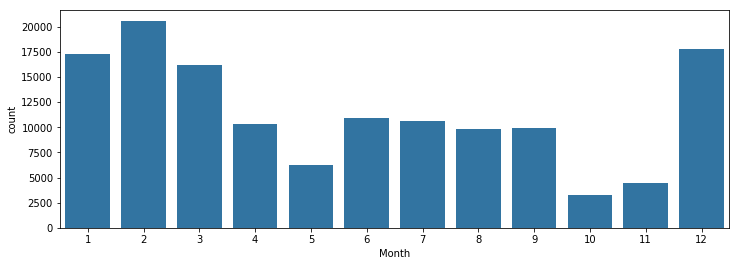

In [22]:
#That's how cancellations by month look like
plt.figure(figsize=(12,4))
sb.countplot(data=df_2008.query('Cancelled==1'), x='Month', color = sb.color_palette()[0]);

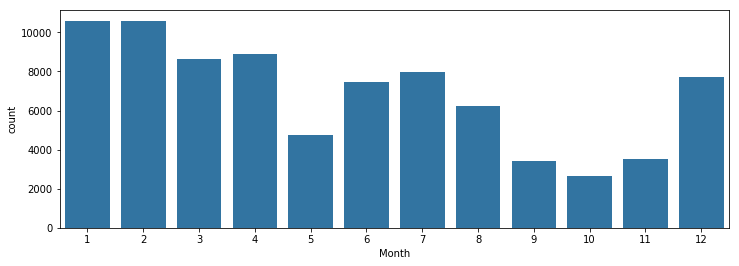

In [23]:
#If weather in US was perfect, then:
plt.figure(figsize=(12,4))
sb.countplot(data=df_2008.query('Cancelled==1 and CancellationCode!="weather"'), x='Month', color = sb.color_palette()[0]);

With perfect weather cancellations would be less volatile, but wouldn't change dramatically.
A bunch of factors cause cancellations of flights. One have a higher chances of flights cancellation in winter than is summer.

Previous visualization is correct. I used historam in FacetGrid, not a barplot. However, it is interchangable.
What about conclusions after faceting:
- In December there are two peaks with more than 1500 flights cancelled - day 19 and day 21. From day 16 till days 23 there are about 1000 or even more flights cancelled.
- In year 1987 highest bars were on 14-15 of December and 27-28 of December. I don't have enough information to confirm or deny my hypothesis about Christmas and winter holidays affecting cancellations.
- There are other days with 1000+ cancellations presented in months 1-4, 7, 9 and as I mentioned previously, 12.

In [24]:
# I want to have a look at most and least common departure times
df_2008['DepHour'] = df_2008['CRSDepTime']//100

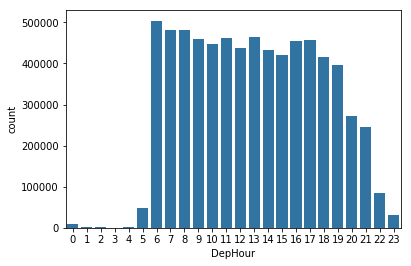

In [25]:
sb.countplot(data = df_2008, x='DepHour', color = sb.color_palette()[0]);

Most of the flights are departed from 6 AM to 10 PM.

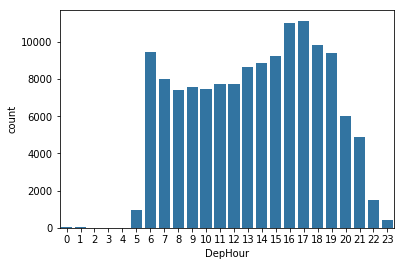

In [26]:
# I wonder how departure time is connected with flight cancellations
sb.countplot(data=df_2008.query('Cancelled==1'), x='DepHour', color=sb.color_palette()[0]);

We see almost the same proportion of cancelled flights by departure hour as we've seen in total flights number.

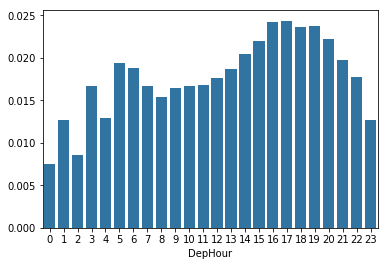

In [27]:
# Now I connect cancellation rate with departure hours
a = df_2008.groupby('DepHour')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0]);

Cancellation rate continiously rises until 7 PM and then start to decline.

In [28]:
# I want to have a look at most and least common arrival times
df_2008['ArrHour'] = df_2008['CRSArrTime']//100

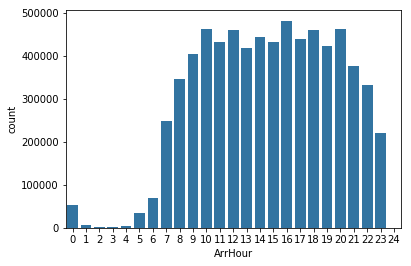

In [29]:
sb.countplot(data = df_2008, x='ArrHour', color = sb.color_palette()[0]);

Very few flights arrive from 0 to 7 AM

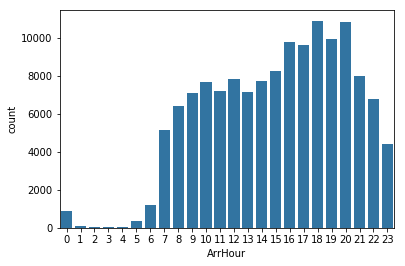

In [30]:
# The same barchart with flight cancellations
sb.countplot(data=df_2008.query('Cancelled==1'), x='ArrHour', color=sb.color_palette()[0]);

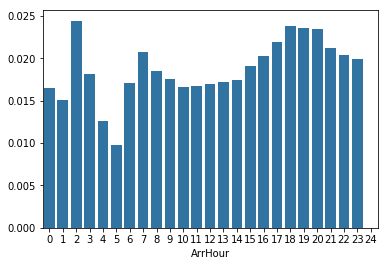

In [31]:
# Now I connect cancellation rate with departure hours
a = df_2008.groupby('ArrHour')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0]);

Cancellation rate by arrival hour looks more stable than the same indicator by departure hour.

Which company made more flights than others in 2008? To answer this question we need to use merging of the dataset with file that contains carrier names.

In [32]:
# carriers names are given in a separate file
df_carrier = pd.read_csv('carriers.csv')
df_carrier

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


In [33]:
# I use merge to bring carrier names from csv.file to main dataframe
df_2008 = pd.merge(df_2008,df_carrier, left_on='UniqueCarrier',right_on='Code',suffixes=('_left', '_right'), how = 'left')

In [34]:
# We don't need Code anymore, so I drop it.
df_2008.drop(['Code'], axis=1);

In [35]:
df_2008.Description.unique()

array(['Southwest Airlines Co.', 'Expressjet Airlines Inc.',
       'Mesa Airlines Inc.', 'Comair Inc.', 'Skywest Airlines Inc.',
       'United Air Lines Inc.',
       'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)',
       'Delta Air Lines Inc.', 'Atlantic Southeast Airlines',
       'Frontier Airlines Inc.', 'AirTran Airways Corporation',
       'Hawaiian Airlines Inc.', 'American Eagle Airlines Inc.',
       'Northwest Airlines Inc.', 'Pinnacle Airlines Inc.',
       'American Airlines Inc.', 'Aloha Airlines Inc.',
       'Alaska Airlines Inc.', 'JetBlue Airways',
       'Continental Air Lines Inc.'], dtype=object)

In [36]:
# in order not no show long names in chart, I replace value with long name (just cutting information about merge)
df_2008.replace({'Description':'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'},'US Airways Inc.', inplace=True)

Remember I didn't answer the question about an anomaly in flight cancellations by carrier in April? I have discovered one interesting fact. 

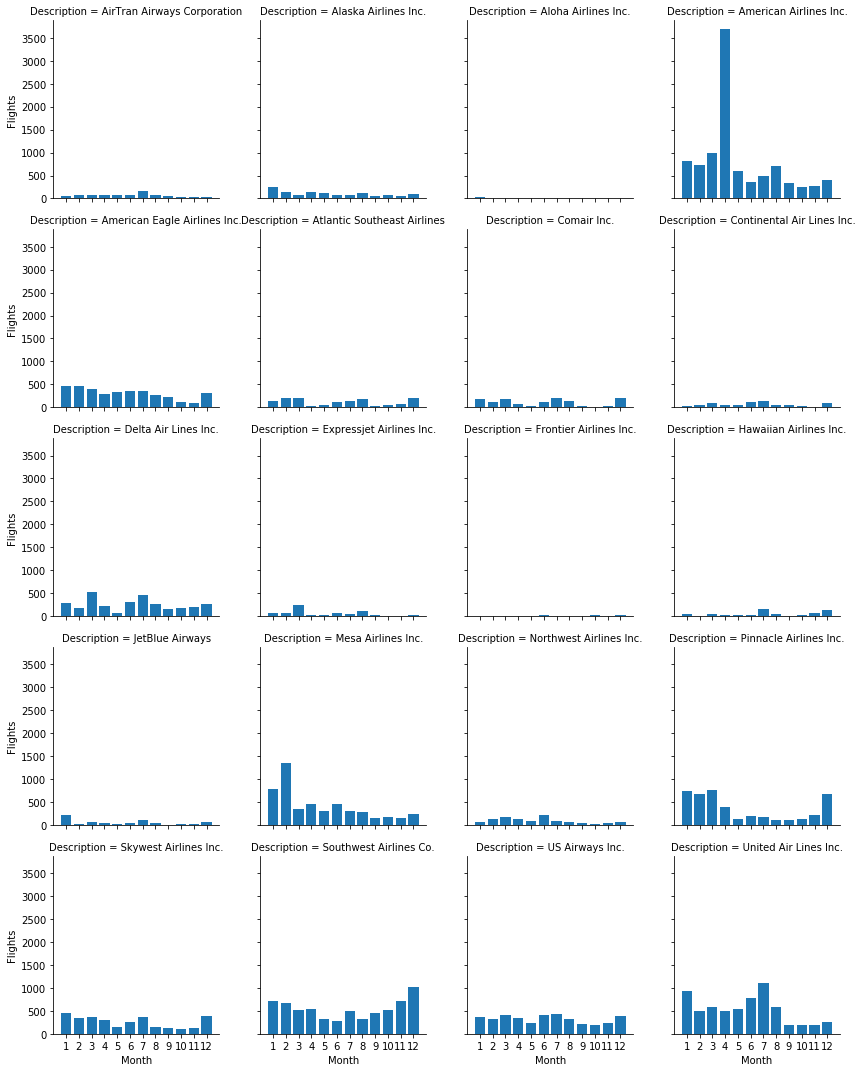

In [37]:
a = df_2008.query('Cancelled==1 and CancellationCode=="carrier"').groupby(['Description', 'Month'])['Year'].count()
a = pd.DataFrame(a)
a = a.reset_index()
a = a.rename(columns={'Year':'Flights'})
g = sb.FacetGrid(data=a, col='Description', col_wrap=4)
g.map(plt.bar,'Month', 'Flights')
ticks = np.arange(1,13,1)
plt.xticks(ticks, ticks);

So, flight cancellations by carrier in April rose significantly due to American Airlines. Another question is why did that happen. And I have an answer on it too. In short, potential wiring hazards in wheel wells that could cause fires or problems with landing gear prompted flight cancellations by American Airlines. Its CEO apologized to passangers.
http://edition.cnn.com/2008/TRAVEL/04/10/american.cancellations/

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


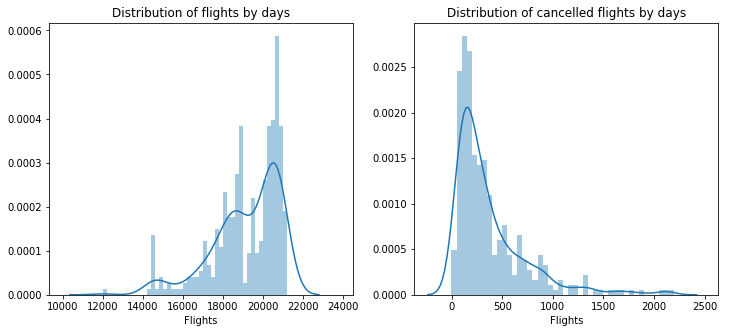

In [38]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.title('Distribution of flights by days')
bins=np.arange(10000,24000,200)
a = pd.DataFrame(df_2008.groupby(['Month','DayofMonth'])['Year'].count())
a = a.reset_index()
a.rename(columns={'Year':'Flights'}, inplace=True)
sb.distplot(a['Flights'], bins=bins);

plt.subplot(1,2,2)
plt.title('Distribution of cancelled flights by days')
bins=np.arange(-1, 2500,50)
b = pd.DataFrame(df_2008.query('Cancelled==1').groupby(['Month','DayofMonth'])['Year'].count())
b = b.reset_index()
b.rename(columns={'Year':'Flights'}, inplace=True)
sb.distplot(b['Flights'], bins=bins);



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


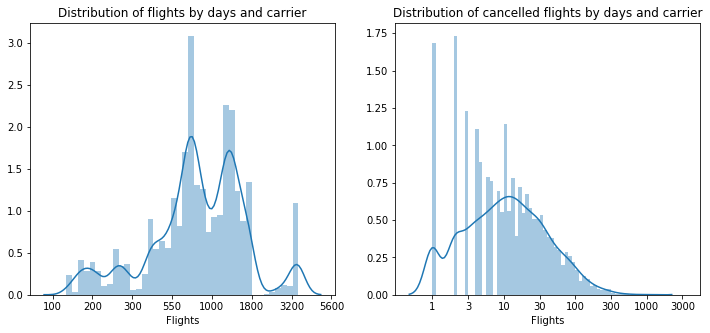

In [39]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3


plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.title('Distribution of flights by days and carrier')
bins=np.arange(0,3700,50)
a = pd.DataFrame(df_2008.groupby(['Description','Month','DayofMonth'])['Year'].count())
a = a.reset_index()
a.rename(columns={'Year':'Flights'}, inplace=True)
a['log_flights'] = a['Flights'].apply(log_trans)
sb.distplot(a['log_flights'])
plt.xlabel('Flights')
ticks=np.arange(2, 3.8, 0.25)
tick_labels= np.around(log_trans(np.arange(2, 3.8,0.25), inverse=True)).astype(int)
plt.xticks(ticks,[100,200,300,550,1000,1800,3200,5600]);

plt.subplot(1,2,2)
plt.title('Distribution of cancelled flights by days and carrier')
bins=np.arange(0, 3.6,0.05)
b = pd.DataFrame(df_2008.query('Cancelled==1').groupby(['Description','Month','DayofMonth'])['Year'].count())
b = b.reset_index()
b.rename(columns={'Year':'Flights'}, inplace=True)
b['log_flights'] = b['Flights'].apply(log_trans)
sb.distplot(b['log_flights'], bins=bins)
ticks=np.arange(0, 3.6, 0.5)
plt.xlabel('Flights')

tick_labels= np.around(log_trans(np.arange(0, 3.6,0.5), inverse=True)).astype(int)
plt.xticks(ticks,[1,3,10,30,100,300,1000,3000]);


In [40]:
tick_labels= log_trans(np.arange(0, 3.6,0.5), inverse=True)
tick_labels

array([1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03])

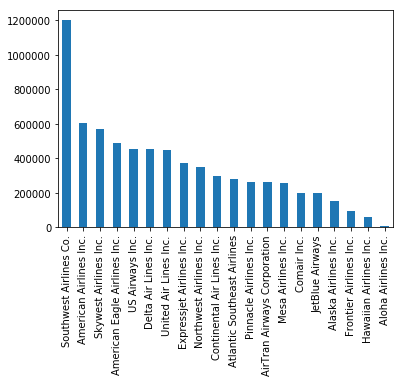

In [41]:
df_2008['Description'].value_counts().plot(kind = 'bar', color = sb.color_palette()[0]);

Southwest Airlines is the biggest carrier in 2008 and has twice more flights than the nearest competitor.

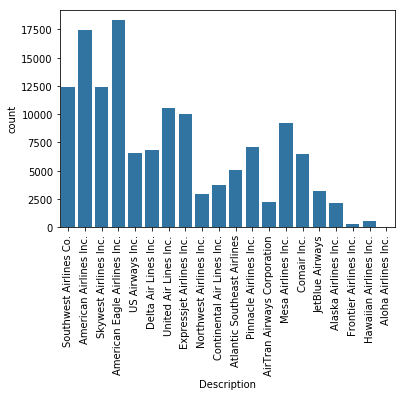

In [42]:
# Number of cancellations by carrier may be disproportional to its number of flights
sb.countplot(data=df_2008.query('Cancelled==1'), x='Description', order = df_2008['Description'].value_counts().index,
             color = sb.color_palette()[0])
plt.xticks(rotation=90);

Biggest carrier has less cancelled flights than number American Airlines and American Eagle Airlines, despite having 2 times more flights carried in 2008. Definitely, they have different cancellation rates.

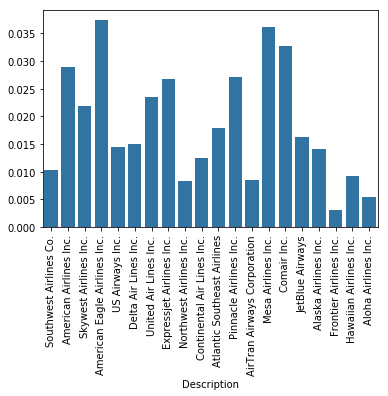

In [43]:
# Cancellation rates by carrier
a = df_2008.groupby('Description')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, order = df_2008['Description'].value_counts().index, color = sb.color_palette()[0])
plt.xticks(rotation=90);

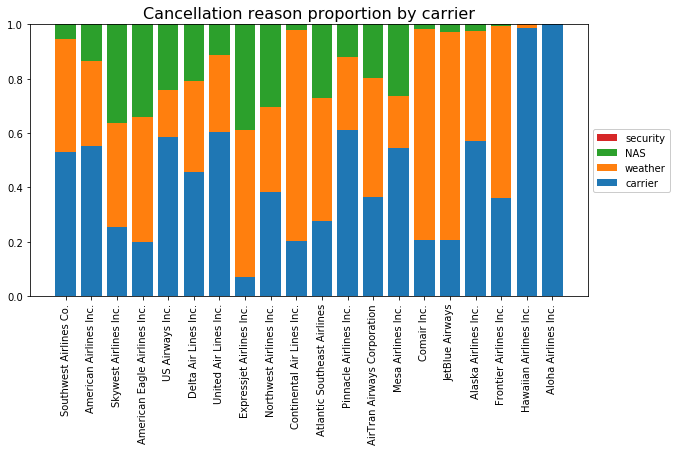

In [44]:
#stacked barplot can make comparison of cancellation reason within each carrier easier
cat1_order = df_2008['Description'].value_counts().index
cat2_order = ['carrier', 'weather', 'NAS', 'security']

artists = [] # for storing references to plot elements
baselines = np.zeros(len(cat1_order))
cat1_counts = df_2008.query('Cancelled ==1')['Description'].value_counts()

plt.figure(figsize=(10,5))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df_2008[(df_2008['CancellationCode']==cat2) & (df_2008['Cancelled']==1)]['Description'].value_counts()
    inner_props = inner_counts / cat1_counts
    # then plot those counts on top of the accumulated baseline
    bars = plt.bar(x = np.arange(len(cat1_order)),
                   height = inner_props[cat1_order],
                   bottom = baselines)
    artists.append(bars)
    baselines += inner_props[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order, rotation=90)
plt.title('Cancellation reason proportion by carrier', fontsize=16)
plt.legend(reversed(artists), reversed(cat2_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6);

Passangers of flights are affected by multiple cancellation reasons in different proportions. For example, Hawaiian Airlines and Aloha Airlines cancel flights mostly by themselves, Skywest Airlines and American Eagle Airlines have only about 20% of flights cancelled for internal reason.

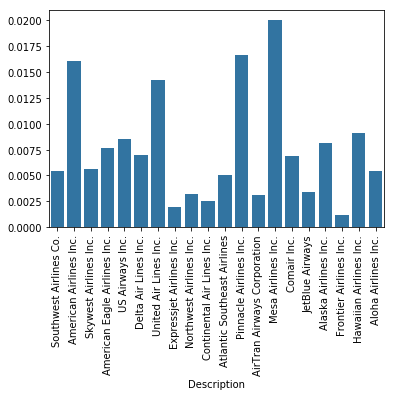

In [45]:
# To be more objective, now let's look on cancellations made by carriers themselves.
a = df_2008.query('CancellationCode not in ["weather", "security", "NAS"]').groupby('Description')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, order = df_2008['Description'].value_counts().index, color = sb.color_palette()[0])
plt.xticks(rotation=90);

We can spot 4 companies that have more than 1% of cancellation rate due to their internal reasons. They are: American Airlines, United Air Lines, Pinacle Airlines, Mesa Airlines. Other carriers have less than 1% rate of indicator, some of them are coping much better with cancellations than others.

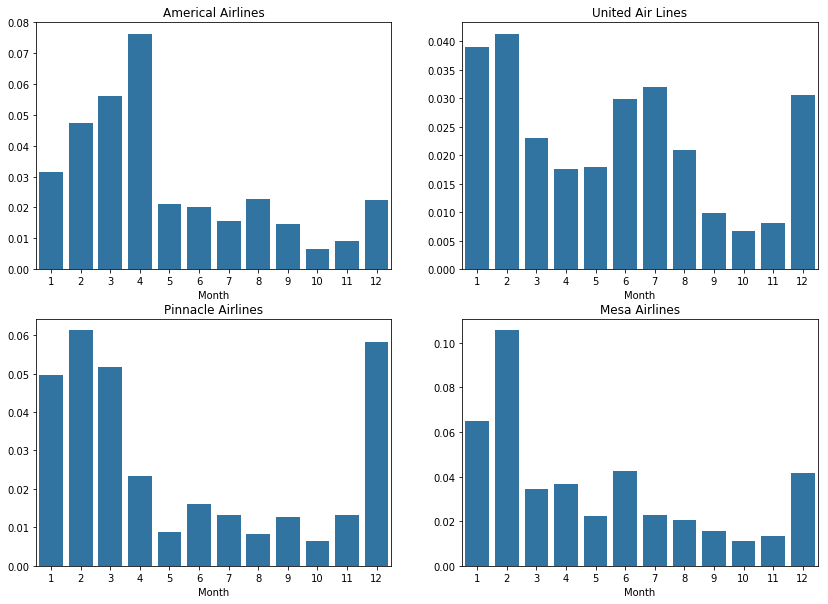

In [46]:
#Are those four companies have stable high cancellation rates throughout a year?
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
a = df_2008.query('Description =="American Airlines Inc."').groupby('Month')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0])
plt.title('Americal Airlines');

plt.subplot(2,2,2)
a = df_2008.query('Description =="United Air Lines Inc."').groupby('Month')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0])
plt.title('United Air Lines');

plt.subplot(2,2,3)
a = df_2008.query('Description =="Pinnacle Airlines Inc."').groupby('Month')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0])
plt.title('Pinnacle Airlines');

plt.subplot(2,2,4)
a = df_2008.query('Description =="Mesa Airlines Inc."').groupby('Month')['Cancelled'].mean()
sb.barplot(x=a.index, y=a.values, color=sb.color_palette()[0])
plt.title('Mesa Airlines');

Three of four carriers have higher cancelletion rates in the first 3 months of the year and in December, comparing to other months. In most cases their cancellation rate by month is higher than the average in the market.

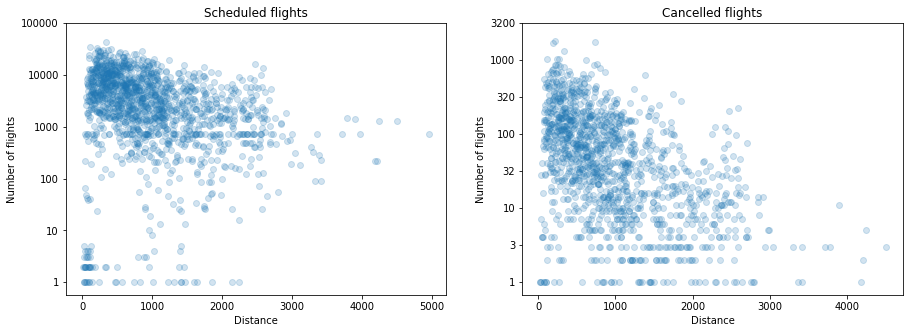

In [47]:
# I use scatter plot to compare number of cancelled flights by distance
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
a = df_2008.groupby('Distance')['Year'].count()
plt.scatter(a.index, log_trans(a.values), alpha=1/5)
ticks = [0,1,2,3,4,5]
tick_labels = log_trans([0,1,2,3,4,5], inverse=True)
plt.yticks(ticks, tick_labels)

plt.xlabel('Distance')
plt.ylabel('Number of flights')
plt.title('Scheduled flights');

plt.subplot(1,2,2)
a = df_2008.query('Cancelled==1').groupby('Distance')['Year'].count()
plt.scatter(a.index, log_trans(a.values), alpha=1/5)
ticks = [0,0.5,1,1.5,2,2.5,3,3.5]
tick_labels = [1, 3, 10, 32, 100, 320, 1000, 3200]
plt.yticks(ticks, tick_labels)


plt.xlabel('Distance')
plt.ylabel('Number of flights')
plt.title('Cancelled flights');

In [56]:
a = df_2008.groupby('Distance')['Year'].count()
a = pd.DataFrame(a)
a = a.reset_index()
a.rename(columns = {'Year':'Flights'}, inplace=True)
a.corr()

,Distance,Flights
Distance,1.000000,-0.322842
Flights,-0.322842,1.000000


In [57]:
a = df_2008.query('Cancelled==1').groupby('Distance')['Year'].count()
a = pd.DataFrame(a)
a = a.reset_index()
a.rename(columns = {'Year':'Flights'}, inplace=True)
a.corr()

,Distance,Flights
Distance,1.000000,-0.334086
Flights,-0.334086,1.000000


With increasing distance both number of flights and number of cancelled flights are declining. This relationship isn't strong, however, a visible one.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


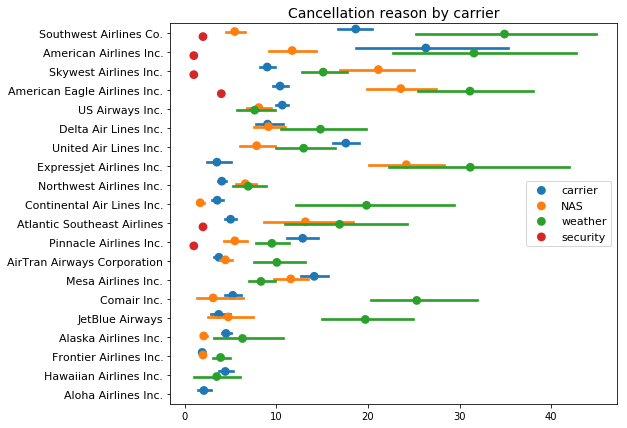

In [48]:
# For a following visualization I need to create a new dataframe
d = df_2008.query('Cancelled==1').groupby(['Description', 'Month', 'DayofMonth','CancellationCode'])['Cancelled'].count()
d = pd.DataFrame(data=d)
d.reset_index(inplace=True)
d.head()

plt.figure(figsize = (8,7))
sb.pointplot(data=d, y='Description', x='Cancelled', hue='CancellationCode', 
             order=df_2008['Description'].value_counts().index, linestyles = '', dodge = 0.4)
plt.legend(loc='right', fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('123').set_visible(False)
plt.xlabel('123').set_visible(False)
plt.xticks(fontsize=10)
plt.title('Cancellation reason by carrier', fontsize=14);

In addition to the fact that carrier and weather are the main reasons for flight cancellations for most of the carriers, all of airlines have different proportion of cancellations by reason. It's not so easy to make implications for a person who is planning to buy a ticket. For instance, if he or she is buying tickets from Comair and it is very import to be at destination on time (at least at the same day), this person should take into account high risks of cancellations due to weather conditions and monitor weather forecast in advance. 

In [49]:
all_flights = df_2008.groupby(['Description', 'Month', 'DayofMonth'])['Year'].count()
all_flights = all_flights.reset_index()
all_flights.rename({'Year': 'Flights'}, axis='columns', inplace=True)
all_flights.head()

,Description,Month,DayofMonth,Flights
0,AirTran Airways Corporation,1,1,745
1,AirTran Airways Corporation,1,2,742
2,AirTran Airways Corporation,1,3,748
3,AirTran Airways Corporation,1,4,741
4,AirTran Airways Corporation,1,5,721


In [50]:
cancelled_flights = df_2008.query('Cancelled==1').groupby(['Description', 'Month', 'DayofMonth'])['Year'].count()
cancelled_flights = cancelled_flights.reset_index()
cancelled_flights.rename({'Year': 'Flights'}, axis='columns', inplace=True)
cancelled_flights.head()

,Description,Month,DayofMonth,Flights
0,AirTran Airways Corporation,1,1,1
1,AirTran Airways Corporation,1,2,5
2,AirTran Airways Corporation,1,4,5
3,AirTran Airways Corporation,1,5,4
4,AirTran Airways Corporation,1,7,5


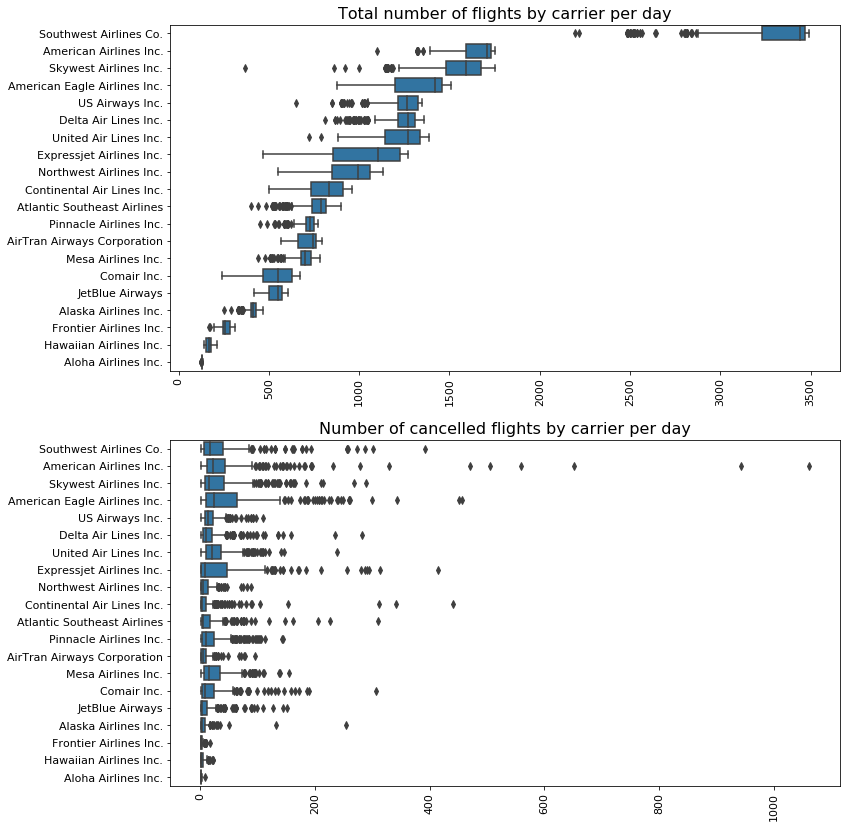

In [51]:
plt.figure(figsize=(12,14))

plt.subplot(2,1,1)
sb.boxplot(data=all_flights, x='Flights', y='Description', color = sb.color_palette()[0], order=df_2008['Description'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Total number of flights by carrier per day', fontsize=16)
plt.ylabel('123').set_visible(False)
plt.xlabel('123').set_visible(False)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)

plt.subplot(2,1,2)
sb.boxplot(data=cancelled_flights, x='Flights', y='Description', color = sb.color_palette()[0], order=df_2008['Description'].value_counts().index)
plt.xticks(rotation=90);
plt.title('Number of cancelled flights by carrier per day', fontsize=16)
plt.ylabel('123').set_visible(False)
plt.xlabel('123').set_visible(False)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11);

Total number of flights is much more stable than number of cancelled flights. Cancelled flighs have outliers that are multiple times bigger than regular numbers.